<a href="https://colab.research.google.com/github/dominikkrisnah/DataScience_MachineLearning_Project/blob/main/Time-Series-Visualization/Variability_TS_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

By: Dominikus Krisna Herlambang | ©2022

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error
import warnings
warnings.filterwarnings('ignore')
from sklearn import metrics
from sklearn.model_selection import cross_val_score
plt.style.use('ggplot')

In [ ]:
# import Dataset & Filter berdasarkan lokasi DKI Jakarta
df = pd.read_csv('/content/drive/MyDrive/Data_Science_CODING/covid_19_indonesia_time_series_all.csv', parse_dates=['Date'])
df_sumsel = df[(df.Location == "Sumatera Selatan")].head(30)

In [ ]:
#Reset Index
df_sumsel.reset_index(inplace=True)
#Memanggil Table
df_sumsel_new = df_sumsel[['Date','Location','Total Cases','Total Deaths']]
df_sumsel_new

,Date,Location,Total Cases,Total Deaths
0,2020-03-23,Sumatera Selatan,1,2
1,2020-03-24,Sumatera Selatan,1,2
2,2020-03-25,Sumatera Selatan,1,2
3,2020-03-26,Sumatera Selatan,1,2
4,2020-03-27,Sumatera Selatan,1,2
5,2020-03-28,Sumatera Selatan,2,2
6,2020-03-29,Sumatera Selatan,2,2
7,2020-03-30,Sumatera Selatan,2,2
8,2020-03-31,Sumatera Selatan,5,2
9,2020-04-01,Sumatera Selatan,5,2


In [ ]:
# Membuat Program Untuk Menghitung garis linear
x = np.array(df_sumsel_new['Total Cases'])

poly = PolynomialFeatures(5, include_bias=False) ## polynomial with 5 degree
poly.fit(x.reshape(-1,1))
hari_poly = poly.transform(x.reshape(-1,1))

#Linear Regresi
lm = LinearRegression()
lm.fit(hari_poly, df_sumsel_new['Total Deaths'])
meninggal_pred = lm.predict(hari_poly)

print('Coefficient : ' + str(lm.coef_))
print('Intercept : ' + str(lm.intercept_))
meninggal_pred

Coefficient : [-1.45629329e-02  1.69093382e-03 -6.89494757e-05  1.08864099e-06
 -5.51770623e-09]
Intercept : 2.0198770301273377


array([2.00693716, 2.00693716, 2.00693716, 2.00693716, 2.00693716,
       1.99698055, 1.99698055, 1.99698055, 1.98138018, 1.98138018,
       1.98756617, 1.99067269, 1.99067269, 2.00289155, 2.00289155,
       2.00289155, 2.00289155, 2.0053283 , 2.00734855, 2.00734855,
       2.00734855, 2.00734855, 2.00889436, 2.01031492, 1.95199522,
       2.03041907, 2.98580054, 3.00299593, 3.00299593, 3.00299593])

Text(0.0, 1.0, 'Korelasi Jum. Kasus Terhadap Jum. Kematian Covid-19\nProvinsi Sumatera Selatan\nMaret-April 2020')

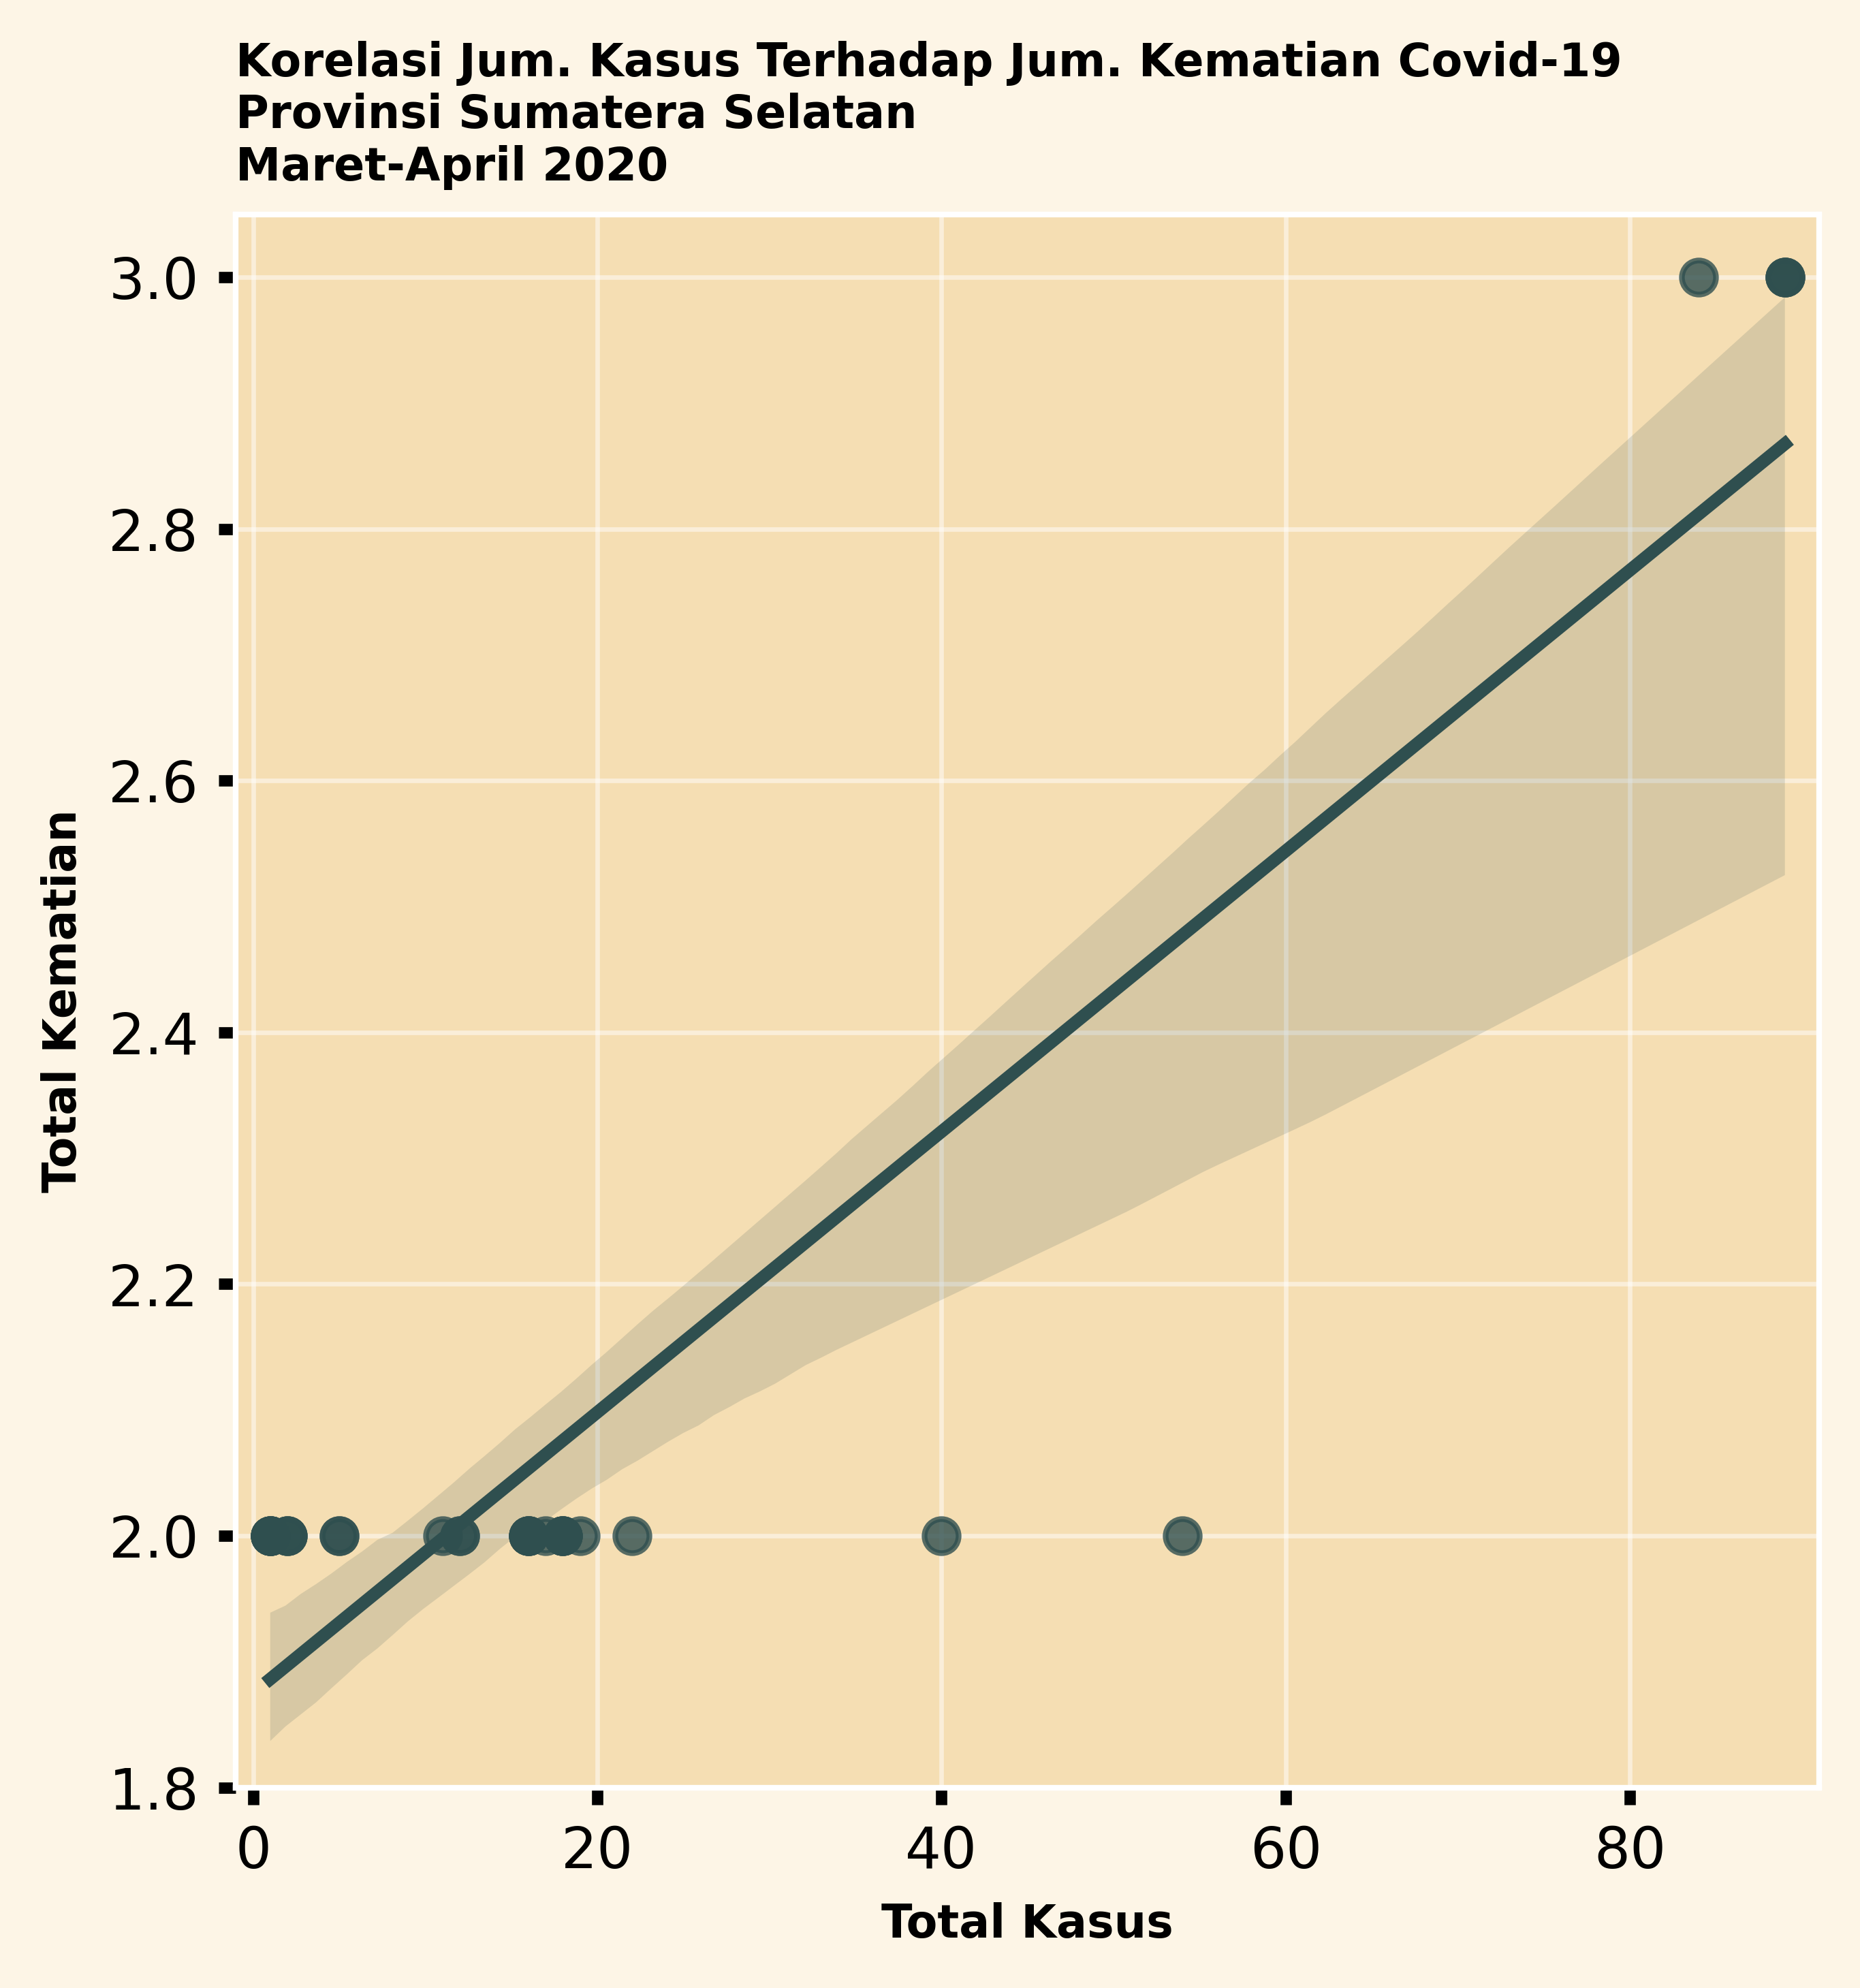

In [ ]:
fig, ax = plt.subplots(figsize=(5,5))

sns.regplot(x='Total Cases', y='Total Deaths', data=df_sumsel_new)
ax.set_xlabel('Total Kasus')
ax.set_ylabel('Total Kematian')
ax.set_title('Korelasi Jum. Kasus Terhadap Jum. Kematian Covid-19\nProvinsi Sumatera Selatan\nMaret-April 2020')

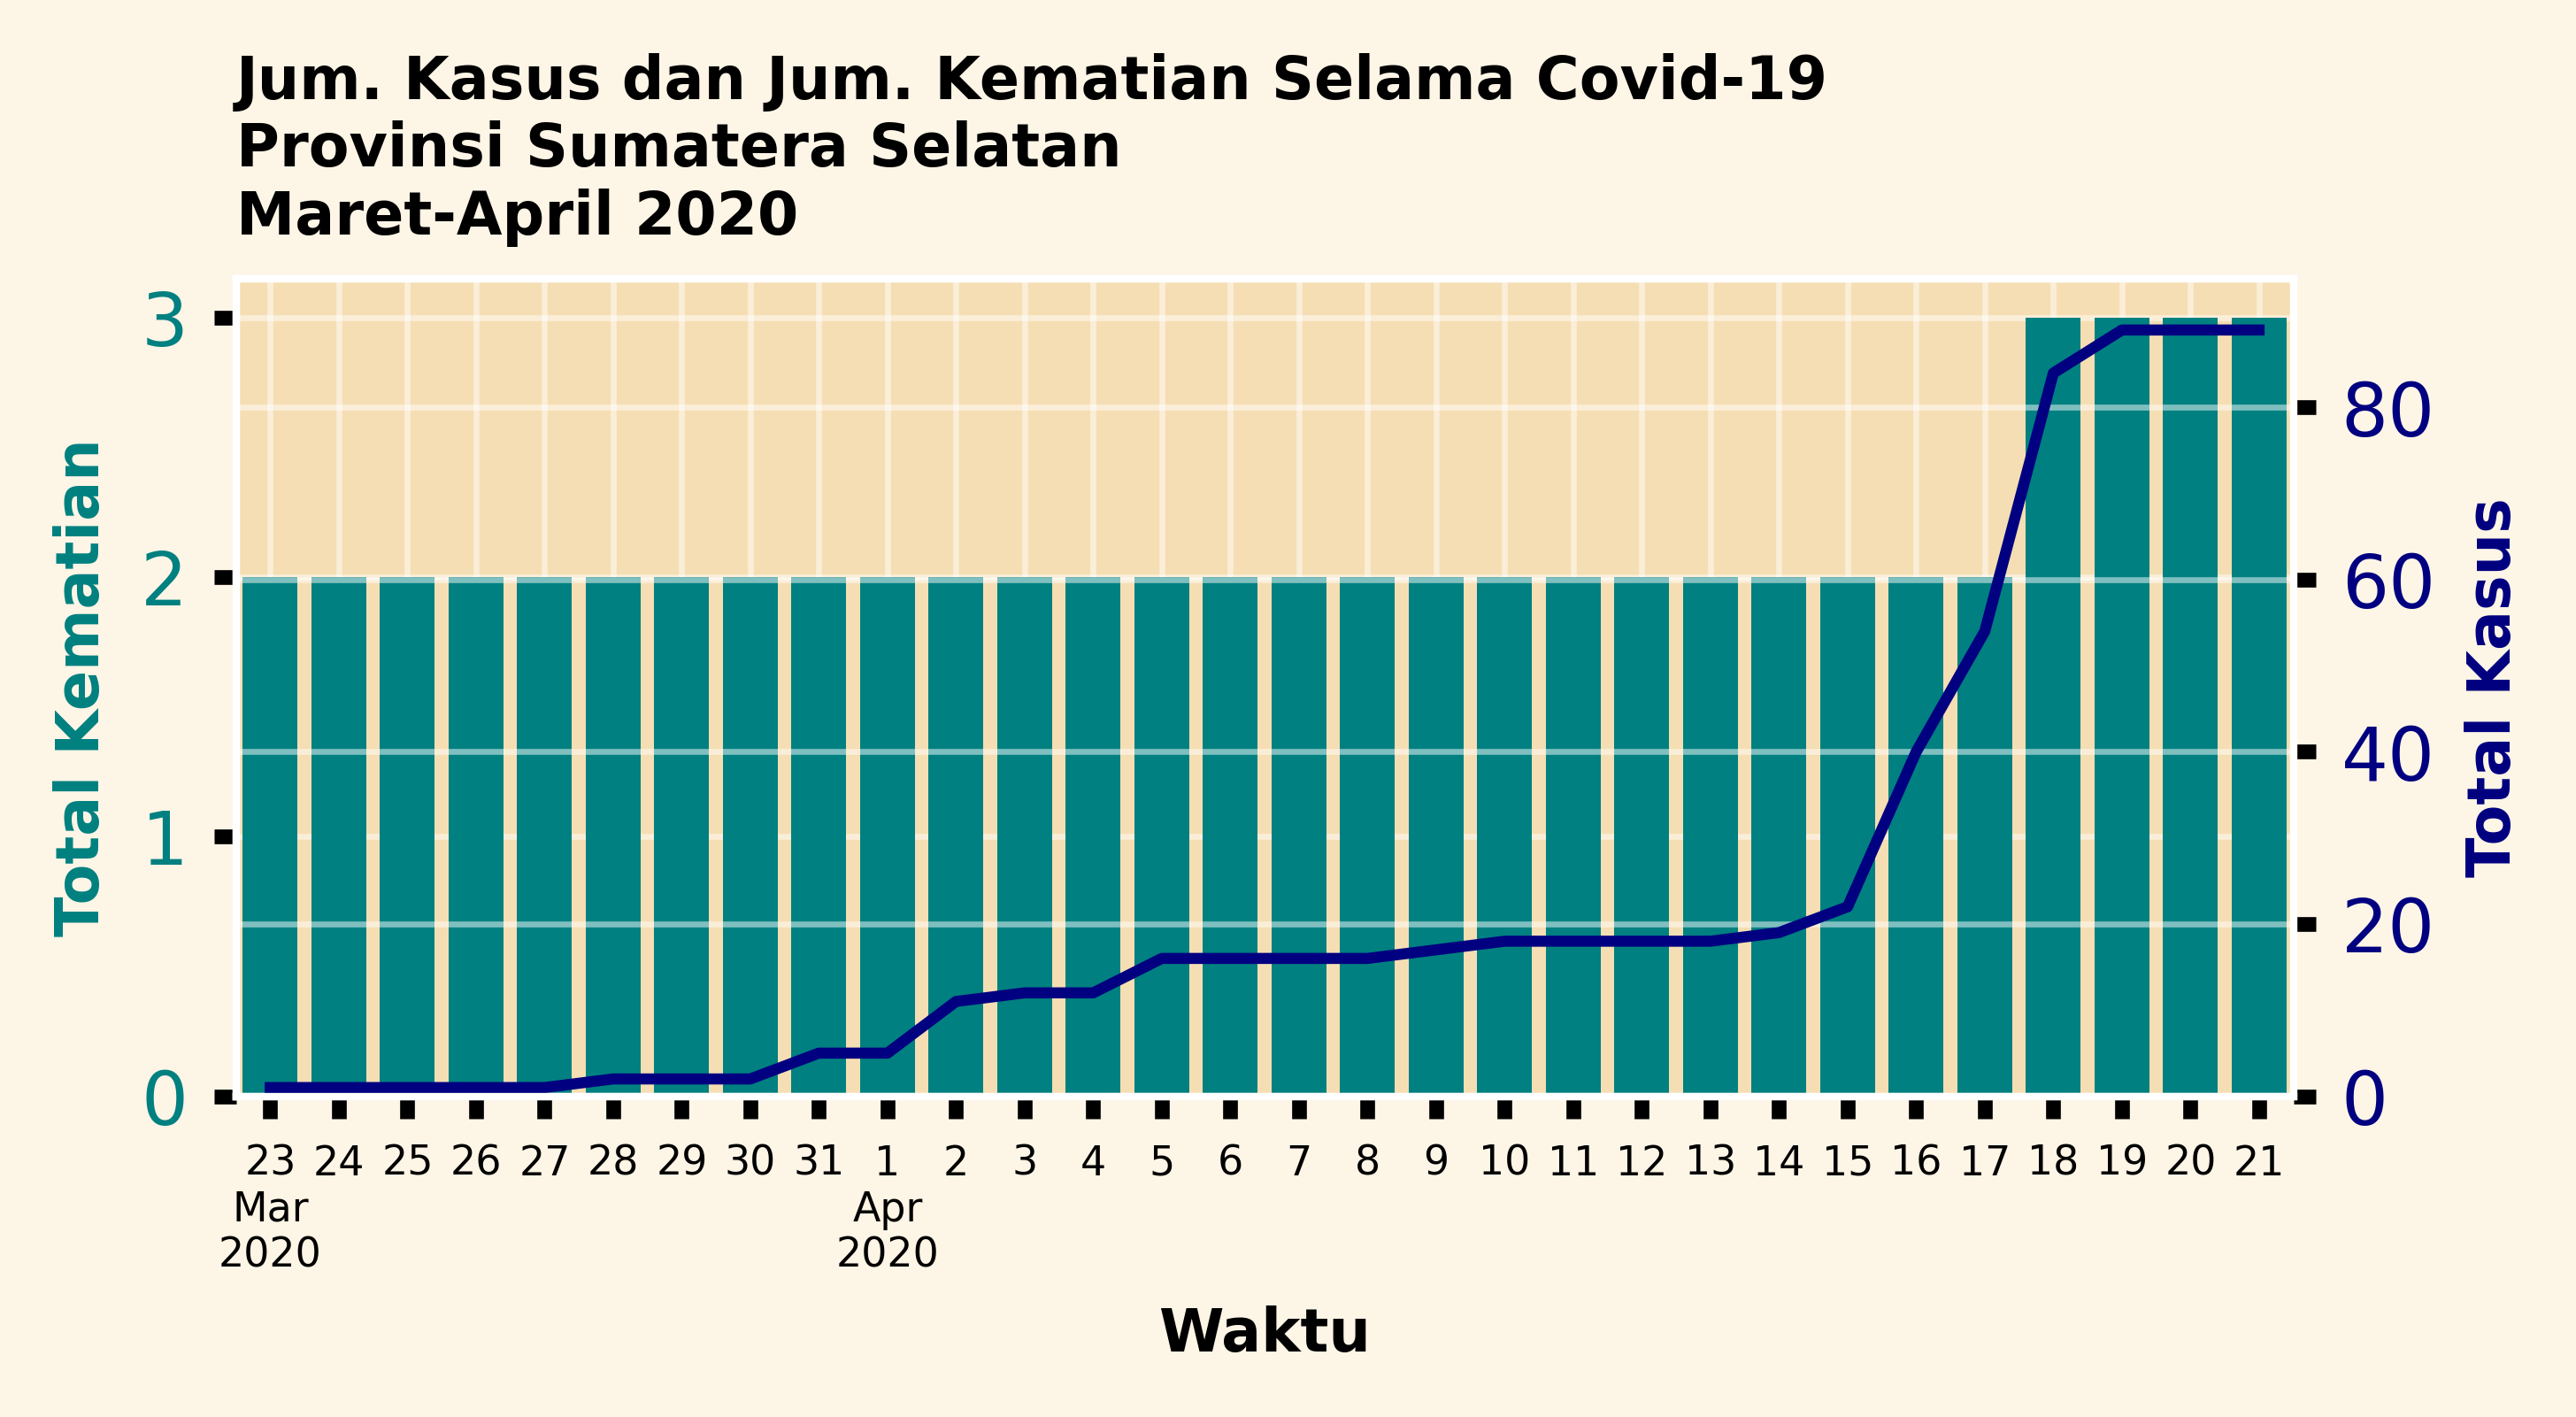

In [ ]:
kasus = np.array(df_sumsel_new['Total Cases'])
kematian = np.array(df_sumsel_new['Total Deaths'])

fig, ax = plt.subplots(figsize=(5,2))

ax.bar(time,kematian)
ax.set_ylabel('Total Kematian')

ax2 = ax.twinx()
ax2.plot(time,kasus)
ax2.set_ylabel('Total Kasus')

ax.set_xlabel('Waktu')
ax.set_title('Jum. Kasus dan Jum. Kematian Selama Covid-19\nProvinsi Sumatera Selatan\nMaret-April 2020')
plt.show()

In [ ]:
def print_evaluate(true, predicted):
    print('__________________________________')
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE  :', mae)
    print('MSE  :', mse)
    print('RMSE :', rmse)
    print('R^2   :', r2_square)
    print('__________________________________')

print_evaluate(meninggal_pred, df_sumsel_new['Total Deaths'])

__________________________________
MAE  : 0.009306045644799199
MSE  : 0.00017372142538425278
RMSE : 0.013180342384940263
R^2   : 0.998494378010106
__________________________________
